In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score


seed = 7
print("Libraries updated")

Libraries updated


In [2]:
# Load data set containing all the data from csv
df = pd.read_csv('Loan_Predict_Dataset.csv')
# Describe the data, Shape and how many rows and columns
print('Number of columns in the dataframe: %i' % (df.shape[1]))
print('Number of rows in the dataframe: %i\n' % (df.shape[0]))

Number of columns in the dataframe: 13
Number of rows in the dataframe: 614



In [3]:
print(list(df.columns))
print(df['Loan_Status'].value_counts(), '\n')

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
Y    422
N    192
Name: Loan_Status, dtype: int64 



In [4]:
print( df.head(5), '\n' )


    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

In [5]:
print( df.describe(), '\n' )

       Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  599.000000       614.000000         614.000000  592.000000   
mean     0.762938      5403.459283        1621.245798  146.412162   
std      1.015216      6109.041673        2926.248369   85.587325   
min      0.000000       150.000000           0.000000    9.000000   
25%      0.000000      2877.500000           0.000000  100.000000   
50%      0.000000      3812.500000        1188.500000  128.000000   
75%      2.000000      5795.000000        2297.250000  168.000000   
max      3.000000     81000.000000       41667.000000  700.000000   

       Loan_Amount_Term  Credit_History  
count         600.00000      564.000000  
mean          342.00000        0.842199  
std            65.12041        0.364878  
min            12.00000        0.000000  
25%           360.00000        1.000000  
50%           360.00000        1.000000  
75%           360.00000        1.000000  
max           480.00000        1.000000   

In [6]:
print(df.isnull().sum(), '\n')


# pandas DataFrame: replace nan values with average of columns
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 



In [7]:
print(df.isnull().sum(), '\n')
print('Number of columns in the dataframe: %i' % (df.shape[1]))
print('Number of rows in the dataframe: %i\n' % (df.shape[0]))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64 

Number of columns in the dataframe: 13
Number of rows in the dataframe: 614



In [8]:
df.dropna(inplace=True)
print(df.isnull().sum(), '\n')
print('Number of columns in the dataframe: %i' % (df.shape[1]))
print('Number of rows in the dataframe: %i\n' % (df.shape[0]))

print("Preprocessing Stage, Visualization Level 1 Done")

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64 

Number of columns in the dataframe: 13
Number of rows in the dataframe: 542

Preprocessing Stage, Visualization Level 1 Done


Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


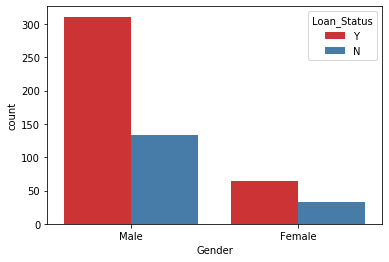

In [9]:
sns.countplot(df['Gender'],hue=df['Loan_Status'],palette='Set1')
print(pd.crosstab(df['Gender'],df['Loan_Status']))
plt.savefig('Gender vs Loan Status')
plt.show()

Married   No  Yes
Gender           
Female    69   29
Male     118  326


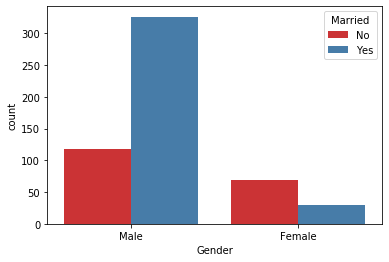

In [10]:
sns.countplot(df['Gender'],hue=df['Married'],palette='Set1')
print(pd.crosstab(df['Gender'],df['Married']))
plt.savefig('Gender vs Married')
plt.show()

Self_Employed   No  Yes
Gender                 
Female          83   15
Male           384   60


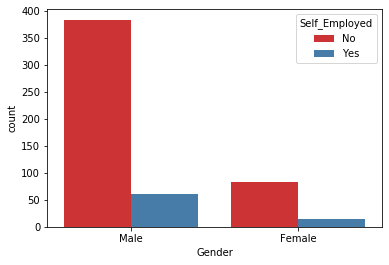

In [11]:
sns.countplot(df['Gender'],hue=df['Self_Employed'],palette='Set1')
print(pd.crosstab(df['Gender'],df['Self_Employed']))
plt.savefig('Gender vs Self Employed')
plt.show()

Property_Area  Rural  Semiurban  Urban
Gender                                
Female            23         49     26
Male             136        160    148


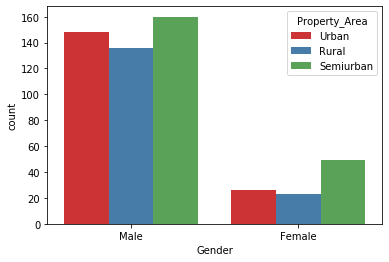

In [12]:
sns.countplot(df['Gender'],hue=df['Property_Area'],palette='Set1')
print(pd.crosstab(df['Gender'],df['Property_Area']))
plt.savefig('Gender vs Property Area')
plt.show()


In [13]:

print(df['Loan_Status'].value_counts(), '\n' )
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)
print(df['Loan_Status'].value_counts(), '\n' )

Y    376
N    166
Name: Loan_Status, dtype: int64 

1    376
0    166
Name: Loan_Status, dtype: int64 



In [14]:

print(df['Gender'].value_counts(), '\n' )
df.Gender=df.Gender.map({'Male':1,'Female':0})
print(df['Gender'].value_counts(), '\n' )



Male      444
Female     98
Name: Gender, dtype: int64 

1    444
0     98
Name: Gender, dtype: int64 



In [15]:

print(df['Married'].value_counts(), '\n' )
df.Married=df.Married.map({'Yes':1,'No':0})
print(df['Married'].value_counts(), '\n' )



Yes    355
No     187
Name: Married, dtype: int64 

1    355
0    187
Name: Married, dtype: int64 



In [16]:

print(df['Education'].value_counts(), '\n' )
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
print(df['Education'].value_counts(), '\n' )



Graduate        425
Not Graduate    117
Name: Education, dtype: int64 

1    425
0    117
Name: Education, dtype: int64 



In [17]:

print(df['Self_Employed'].value_counts(), '\n' )
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
print(df['Self_Employed'].value_counts(), '\n' )

No     467
Yes     75
Name: Self_Employed, dtype: int64 

0    467
1     75
Name: Self_Employed, dtype: int64 



In [18]:
print(df['Property_Area'].value_counts(), '\n' )
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
print(df['Property_Area'].value_counts(), '\n' )

Semiurban    209
Urban        174
Rural        159
Name: Property_Area, dtype: int64 

1    209
2    174
0    159
Name: Property_Area, dtype: int64 



In [19]:
print( df.head(5), '\n' )

print("Preprocessing Stage, Visualization Level 2 Done")

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0         0.0          1              0   
1  LP001003       1        1         1.0          1              0   
2  LP001005       1        1         0.0          1              1   
3  LP001006       1        1         0.0          0              0   
4  LP001008       1        0         0.0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2       

In [20]:
X = df.iloc[:,1:12]
#print("X = ",'\n', X)
y = df.iloc[:,-1]
#print('\n', Y)


train_X,test_X,train_y,test_y = train_test_split(
    X,y,test_size=0.1, random_state=seed )


print('\n train_X = \n', train_X)
print('\n test_X = \n', test_X)
print('\n train_y = \n', train_y)
print('\n test_y = \n', test_y)



 train_X = 
      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
521       1        0         0.0          1              0             2500   
532       1        0         2.0          1              0             3588   
31        1        0         0.0          1              0             3167   
160       1        1         0.0          0              0             1863   
393       1        1         2.0          0              0             1993   
..      ...      ...         ...        ...            ...              ...   
243       1        1         2.0          1              1             6250   
566       1        0         0.0          1              0             3333   
609       0        0         0.0          1              0             2900   
222       1        0         0.0          1              0             2971   
200       1        1         1.0          0              0             2600   

     CoapplicantIncome  LoanAmount  L

In [21]:
final_test = test_X.iloc[0:10]
print('\n final_test = \n', final_test)


print("\n Machine Learning Model Build \n")


 final_test = 
      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
382       0        0         0.0          1              0             6000   
250       1        1         0.0          0              0             1668   
313       1        1         2.0          1              1             5746   
252       1        0         0.0          0              1             2583   
533       1        0         1.0          1              0            11250   
3         1        1         0.0          0              0             2583   
59        1        1         2.0          0              0             3357   
235       1        1         1.0          1              0             5500   
248       1        1         1.0          1              0             2882   
166       0        1         0.0          1              0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
382                0.0       156.0       

In [22]:
models=[]
#models.append(("logreg",LogisticRegression()))
#Logistic Regression Algorithm

LR = LogisticRegression()
LR.fit(train_X,train_y)
pred = LR.predict(test_X)

print("accuracy_score", accuracy_score(test_y,pred), '\n')


outp = LR.predict(final_test)
print( "Output Prediction = ", outp, '\n' )
print('\n', test_y[:10])



accuracy_score 0.8909090909090909 

Output Prediction =  [1 0 1 1 1 1 1 1 1 1] 


 382    1
250    0
313    1
252    1
533    0
3      1
59     1
235    1
248    1
166    0
Name: Loan_Status, dtype: int64


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
##Random Forest
RF = RandomForestClassifier(n_estimators = 100) 
RF.fit(train_X,train_y)
RF_Prediction = RF.predict(test_X)
outp2 = RF.predict(final_test)
print('\n', test_y[:10], '\n')
print("RF Alg Accuracy", accuracy_score(test_y,RF_Prediction), '\n')
print( "Output Prediction RF = ", outp2, '\n' )




 382    1
250    0
313    1
252    1
533    0
3      1
59     1
235    1
248    1
166    0
Name: Loan_Status, dtype: int64 

RF Alg Accuracy 0.9272727272727272 

Output Prediction RF =  [1 0 1 1 0 1 1 1 1 1] 



In [24]:
#KNN
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(train_X,train_y)
KNN_Prediction = KNN_Model.predict(test_X)
outp3 = KNN_Model.predict(final_test)
print('\n', test_y[:10])
print("KNN Alg Accuracy", int(accuracy_score(test_y,KNN_Prediction) *100), "Percent" )
print( "Output Prediction KNN = ", outp3, '\n' )




 382    1
250    0
313    1
252    1
533    0
3      1
59     1
235    1
248    1
166    0
Name: Loan_Status, dtype: int64
KNN Alg Accuracy 74 Percent
Output Prediction KNN =  [1 1 1 1 1 1 1 1 1 0] 



In [25]:
#SVM
SVM_Model = svm.SVC()
SVM_Model.fit(train_X,train_y)
SVM_Prediction = SVM_Model.predict(test_X)
outp4 = SVM_Model.predict(final_test)
print('\n', test_y[:10])
print("SVM Alg Accuracy", int(accuracy_score(test_y,SVM_Prediction) *100), "Percent" )
print( "Output Prediction SVM = ", outp4, '\n' )



 382    1
250    0
313    1
252    1
533    0
3      1
59     1
235    1
248    1
166    0
Name: Loan_Status, dtype: int64
SVM Alg Accuracy 80 Percent
Output Prediction SVM =  [1 1 1 1 1 1 1 1 1 1] 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
print("Project End")

Project End
